In [ ]:
# https://www.w3schools.com/python/numpy/numpy_array_search.asp

In [1]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5, 4, 4])

x = np.where(arr == 4)

print(x)

(array([3, 5, 6]),)


In [2]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

x = np.where(arr % 2 == 0)

print(x)

(array([1, 3, 5, 7]),)


In [4]:
import numpy as np

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

x = np.where(arr % 2 == 1)

print(x)

(array([0, 2, 4, 6]),)


In [7]:
# Visszaadja azokat az indexeket, ahol a tömb elemei nem nulla / nem hamis értékek
a = np.array([0,5,0,7])
x = np.nonzero(a)
print(x)

(array([1, 3]),)


In [2]:
import numpy as np

# argwhere: Visszaad minden olyan indexet, ahol a feltétel True.
# Itt az 5 és 7 számok indexeit adja vissza egy mátrixban
a = np.array([ 
    [0, 5], 
    [0, 7] 
])
x = np.argwhere(a > 0)
print(x)

[[0 5]
 [0 7]]
[[0 1]
 [1 1]]


In [12]:
arr = np.array([1,3,5,7])
x = np.searchsorted(arr, 4)
print(x)

2


In [13]:
import numpy as np

arr = np.array([6, 7, 8, 9])

x = np.searchsorted(arr, 7) # side default értéke: left
# balról indul, lefelezi a tartományt, azt látja, hogy az előtte lévő egyenlő volt vele, úgyhogy elé beszúrhatja, így lesz 1-es indexű helyen az új elem

print(x) 

1


In [14]:
import numpy as np

arr = np.array([6, 7, 8, 9]) # 4 elem, annak a fele 2 elem és megnézi, attól függően, hogy jobbos vagy balos, hogy az előtte/utána lévő eleme az kisebb-e / nagyobb-e és arra megy tovább a felezés, amerre "bepasszol"

x = np.searchsorted(arr, 7, side='right') # ha jobbról kezdjük el nézni, akkor lefelezzük a tartományt és azt látjuk, hogy a tőle balra lévő elem a 7-es, aminek az indexe 1, viszont ez utána fogja beszúrni, ami a 2-es indexű hely

print(x) 

2


In [16]:
import numpy as np

arr = np.array([1, 3, 5, 7])

# ez nem szúrja be az elemeket! csak megnézi, hogy hova kerülne be az új tömb aktuális eleme az eredeti tömbbe (az eredeti tömb, mindig változatlan marad ebben az esetben)
x = np.searchsorted(arr, [2, 4, 10]) # megkeresni, hogy hova "szúródna" be az aktuális tömbelem az alap tömbbe

print(x) 

[1 2 4]


In [3]:
# 1. feladat – Szenzoradatok elemzése

import numpy as np

temps = np.array([21.1, 21.0, 21.3, 50.2, 51.0, 21.5, 21.2])

# a) 40°C feletti értékek indexei
idx = np.where(temps > 40)
print(idx)                    # (array([3, 4]))

# b) Indexek és értékek
for i in idx[0]: # ebben az esetben az idx[0] az a [3, 4] tömb
    print(i, temps[i])        # 3 50.2 és 4 51.0

# c) Mikor történt? 0.5s mintavétel -> idő = index * 0.5
times = idx[0] * 0.5 # [3, 4] * 0,5, akkor megkapod az eredményt:
print(times)                  # array([1.5, 2.0])

(array([3, 4]),)
3 50.2
4 51.0
[1.5 2. ]


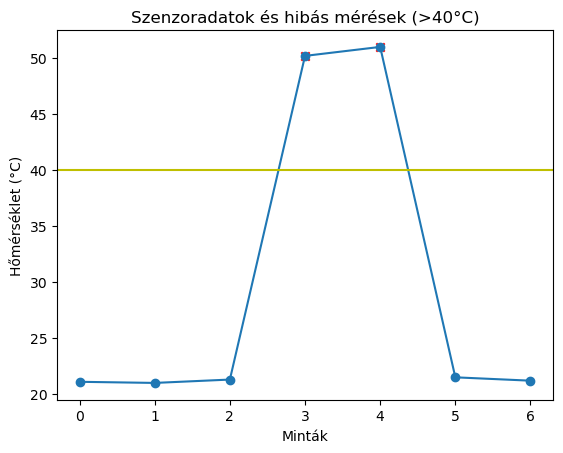

In [6]:
import numpy as np
import matplotlib.pyplot as plt

temps = np.array([21.1, 21.0, 21.3, 50.2, 51.0, 21.5, 21.2])
idx = np.where(temps > 40)[0]

plt.figure()
plt.plot(temps, marker='o')
plt.scatter(idx, temps[idx], marker='x', color='red')  # hibás pontok jelölése
plt.axhline(40, color='y')
plt.title("Szenzoradatok és hibás mérések (>40°C)")
plt.xlabel("Minták")
plt.ylabel("Hőmérséklet (°C)")
plt.show()

In [8]:
# 2. feladat – Árfolyamváltozás vizsgálata (finance)

eur = np.array([390, 392, 391, 405, 407, 399, 398])

# a) Hol lépte át a 400 Ft-ot?
idx = np.where(eur > 400)
print(idx)                    # (array([3, 4]),)

# b) Első ilyen nap
first = idx[0][0]
print(first)                  # 3

# c) Hány nap volt visszaesés?
drops = np.where(eur[1:] < eur[:-1])

# for ciklussal az i. és i+1. elem összehasonlítása

# eur[:-1] -->  [390, 392, 391, 405, 407, 399] --> "tegnap"
# eur[1:]  -->  [392, 391, 405, 407, 399, 398] -->  "ma"
# hol volt "tegnap" nagyobb érték, mint "ma"?

print(drops)                  # (array([1, 4, 5]),) --> ezek a helyi visszaesések
# amikor 390-ből 392 lett, ott nem volt visszaesés, úgyhogy az most nekünk nem érdekes és a többit, ami nem érdekes, ide nem kommenteltem ki
# amikor 392-ből 391 lesz, a 392 indexe pedig 1
# amikor 407-ből 399 lesz, a 407 indexe pedig 4
# amikor 399-ből 398 lesz, a 399 indexe pedig 5

(array([3, 4]),)
3
(array([1, 4, 5]),)


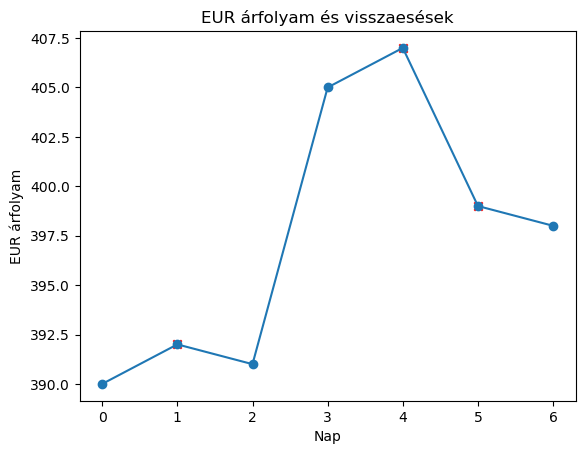

In [12]:
eur = np.array([390, 392, 391, 405, 407, 399, 398])
drops = np.where(eur[1:] < eur[:-1])[0]

plt.figure()

plt.plot(eur, marker='o')
plt.scatter(drops, eur[drops], marker='x', color='r')  # visszaesések
plt.title("EUR árfolyam és visszaesések")
plt.xlabel("Nap")
plt.ylabel("EUR árfolyam")
plt.show()

In [23]:
# 3. feladat – Logfájlok elemzése (hibakódok keresése)

codes = np.array([200, 200, 503, 200, 404, 503, 200])

# a) Hol van 503?
idx_503 = np.where(codes == 503)
print(idx_503)                # (array([2, 5]),)

# b) Minden hibás sor (nem 200)
errors = np.where(codes != 200)
print(errors)                 # (array([2, 4, 5]),)

# c) Első hibás sor
first_error = errors[0][0]
print(first_error)            # 2

(array([2, 5]),)
(array([2, 4, 5]),)
2


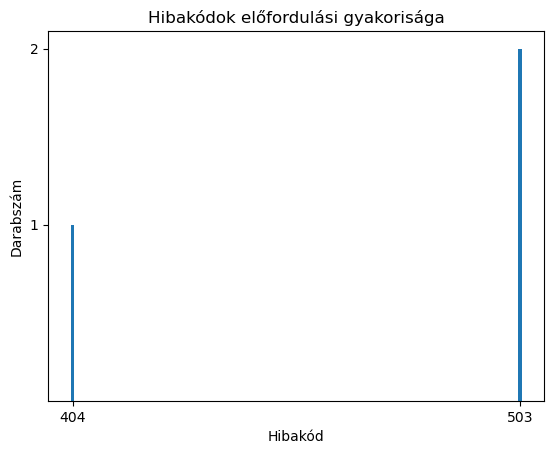

In [45]:
import numpy as np
import matplotlib.pyplot as plt

codes = np.array([200, 200, 503, 200, 404, 503, 200])

# Csak a hibakódok kiválasztása (nem 200)
errors = codes[codes != 200]

# Hibakódok és gyakoriságuk
unique_errors, counts = np.unique(errors, return_counts=True)

plt.figure()
plt.bar(unique_errors, counts)  # barchart automatikus matplotlib színekkel
plt.title("Hibakódok előfordulási gyakorisága")
plt.xlabel("Hibakód")
plt.ylabel("Darabszám")
plt.xticks(unique_errors)
plt.yticks(counts)
plt.show()

In [15]:
# 4. feladat – Képfeldolgozás: maszkolás és objektumkeresés

mask = np.array([
    [0, 0, 1, 1],
    [0, 0, 1, 0],
    [1, 0, 0, 0]
])

# a) Hol vannak az 1-esek?
coords = np.argwhere(mask == 1)
print(coords)
# [[0 2]
#  [0 3]
#  [1 2]
#  [2 0]]

# b) Hány pixel?
count = np.count_nonzero(mask)
print(count)                  # 4

# c) Bounding box
rows = coords[:, 0] # első (0.) oszlop --> vagyis a sorok
cols = coords[:, 1] # második (1.) oszlop --> vagyis az oszlopok
min_row = rows.min()
max_row = rows.max()
min_col = cols.min()
max_col = cols.max()
print(min_row, max_row, min_col, max_col)
# 0 2 0 3
# tehát:
# sor: 0-tól --> 2-ig
# oszlop: 0-tól --> 3-ig
# befoglaló téglalap:
# [0,0] -------------------- [0,3]
#   |                          |
#   |                          |
# [2,0] -------------------- [2,3]
# lásd ugyanezt a plot-on mindjárt -->

[[0 2]
 [0 3]
 [1 2]
 [2 0]]
(array([0, 0, 1, 2]), array([2, 3, 2, 0]))
0 2 0 3


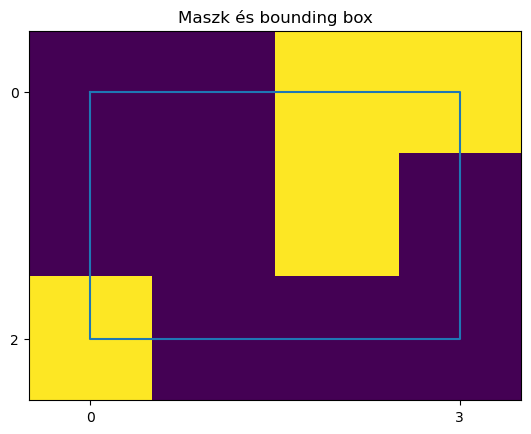

In [19]:
mask = np.array([
    [0,0,1,1],
    [0,0,1,0],
    [1,0,0,0]
])

coords = np.argwhere(mask == 1)
rows, cols = coords[:,0], coords[:,1]
min_r, max_r = rows.min(), rows.max()
min_c, max_c = cols.min(), cols.max()

plt.figure()
plt.imshow(mask)
plt.title("Maszk és bounding box")
plt.plot([min_c, max_c, max_c, min_c, min_c],
         [min_r, min_r, max_r, max_r, min_r])
plt.xticks([min_c, max_c])
plt.yticks([min_r, max_r])
plt.show()

In [21]:
# 5. feladat – GPS/nyomkövetés: sebességtúllépések detektálása

speeds = np.array([45, 49, 50, 51, 55, 48, 70, 72, 49])

# a) Hol lépte túl az 50-et?
idx = np.where(speeds > 50)
print(idx)                     # (array([3, 4, 6, 7]),)

# b) Legnagyobb túllépés helye és értéke
new_arr = speeds - 50
print(new_arr)

max_idx = np.argmax(speeds)
print(max_idx, speeds[max_idx])  # 7, 72

# c) Hány túllépés?
print(len(idx[0]))              # 4

(array([3, 4, 6, 7]),)
[-5 -1  0  1  5 -2 20 22 -1]
7 72
4


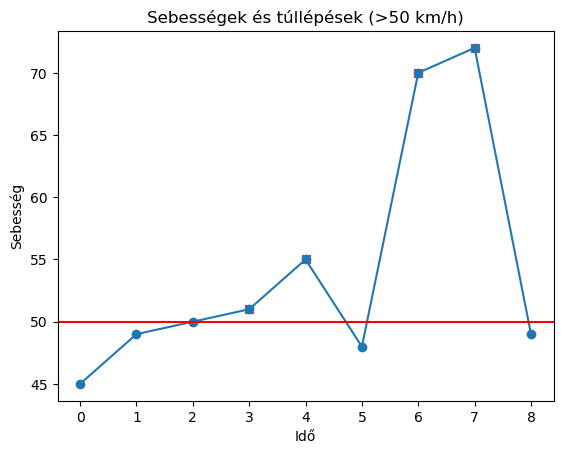

In [73]:
speeds = np.array([45, 49, 50, 51, 55, 48, 70, 72, 49])
idx = np.where(speeds > 50)[0]

plt.figure()
plt.plot(speeds, marker='o')
plt.scatter(idx, speeds[idx], marker='x', color='r')

# 50 km/h határvonal
plt.axhline(50, color='r')  # piros vonal

plt.title("Sebességek és túllépések (>50 km/h)")
plt.xlabel("Idő")
plt.ylabel("Sebesség")
plt.show()

In [23]:
# 6. feladat – Termékárak listája és keresés beszúrási helye

prices = np.array([1200, 1500, 1600, 1990, 2300, 2500])

# a) Hova szúrjuk a 1700-at?
print(np.searchsorted(prices, 1700))   # 3

# b) Hova kerülne 1499?
print(np.searchsorted(prices, 1499))   # 1

# c) Tartományon kívüliek (1500–2300)
bad = np.where((prices < 1500) | (prices > 2300))
print(bad)                             # (array([0, 5]),)

3
1
(array([0, 5]),)


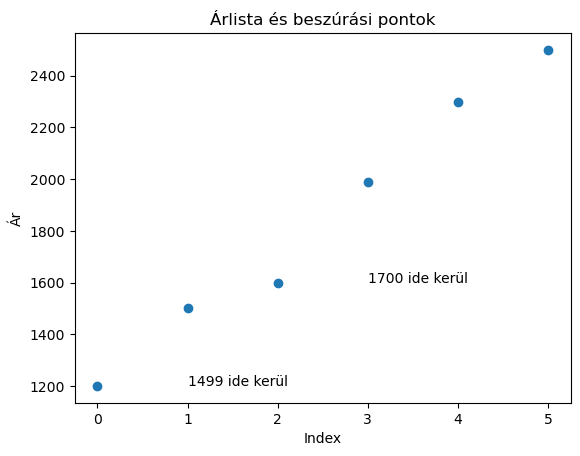

In [59]:
prices = np.array([1200, 1500, 1600, 1990, 2300, 2500])
ins1 = np.searchsorted(prices, 1700)
ins2 = np.searchsorted(prices, 1499)

plt.figure()
plt.scatter(range(len(prices)), prices)
plt.title("Árlista és beszúrási pontok")
plt.xlabel("Index")
plt.ylabel("Ár")

plt.annotate("1700 ide kerül", (ins1, prices[ins1-1]))
plt.annotate("1499 ide kerül", (ins2, prices[max(0,ins2-1)]))
plt.show()

In [28]:
# 7. feladat – Idősor: kiugró értékek keresése

data = np.array([10, 12, 9, 11, 70, 80, 12, 11, 8])

# a) 25-nél nagyobb elemet (kiugró érték)
idx = np.where(data > 25)
print(idx)                      # (array([4]),)

# b) Index és érték
print(idx[0][0], data[idx[0][0]])  # 4, 70

# c) Hány ilyen van?
print(len(idx[0]))              # 1

(array([4, 5]),)
4 70
2


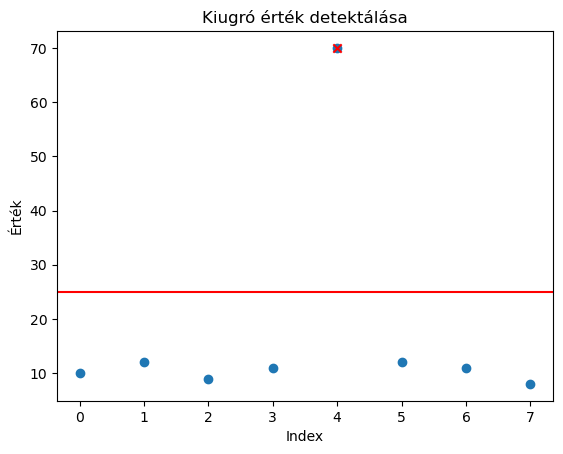

In [27]:
data = np.array([10, 12, 9, 11, 70, 12, 11, 8])
idx = np.where(data > 25)[0]

plt.figure()
plt.scatter(range(len(data)), data, marker='o')
plt.scatter(idx, data[idx], marker='x', color='r')
plt.axhline(25, color='r')
plt.title("Kiugró érték detektálása")
plt.xlabel("Index")
plt.ylabel("Érték")
plt.show()

In [27]:
# 8. feladat – Tanulmányi átlagok vizsgálata

averages = np.array([3.2, 4.1, 2.9, 5.0, 4.5, 3.8])

# a) 4.0 felettiek
idx = np.where(averages > 4.0)
print(idx)                      # (array([1, 3, 4]),)

# b) Hányan vannak?
print(len(idx[0]))              # 3

# c) Legjobb tanuló
best = np.argmax(averages)
print(best, averages[best])     # 3, 5.0

(array([1, 3, 4]),)
3
3 5.0


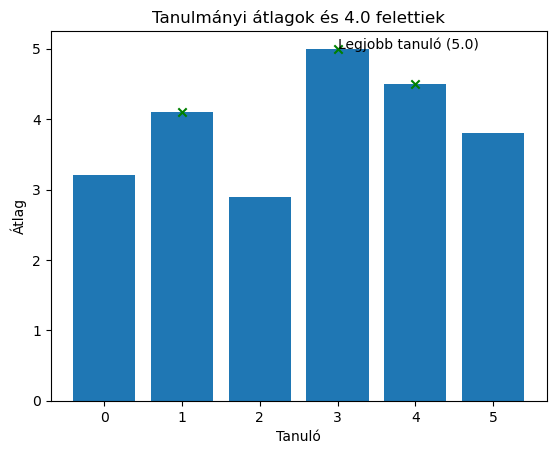

In [78]:
avg = np.array([3.2, 4.1, 2.9, 5.0, 4.5, 3.8])
idx = np.where(avg > 4.0)[0]

plt.figure()
plt.bar(range(len(avg)), avg)
plt.scatter(idx, avg[idx], marker='x', color='g')
plt.title("Tanulmányi átlagok és 4.0 felettiek")
plt.xlabel("Tanuló")
plt.ylabel("Átlag")

best = np.argmax(averages)
plt.annotate("Legjobb tanuló (" + str(averages[best]) + ")", (best, averages[best]))

plt.show()

In [29]:
# 9. feladat – Egészségügyi adatok: pulzusmérés

pulse = np.array([72, 75, 140, 150, 80, 76, 155, 74])

# a) 130 fölötti pulzusok
idx = np.where(pulse > 130)
print(idx)                      # (array([2, 3, 6]),)

# b) Első veszélyes érték
print(idx[0][0])                # 2

# c) Maximum pulzus indexe
print(np.argmax(pulse))         # 6

(array([2, 3, 6]),)
2
6


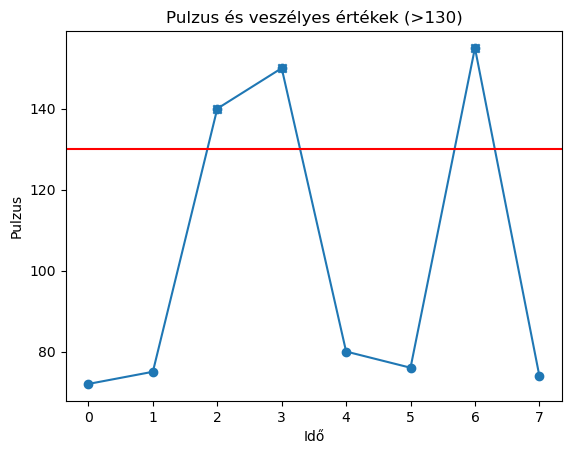

In [64]:
pulse = np.array([72, 75, 140, 150, 80, 76, 155, 74])
idx = np.where(pulse > 130)[0]

plt.figure()
plt.plot(pulse, marker='o')
plt.scatter(idx, pulse[idx], marker='x')
# 130-as pulzusszám határvonal
plt.axhline(130, color='r')  # piros vonal
plt.title("Pulzus és veszélyes értékek (>130)")
plt.xlabel("Idő")
plt.ylabel("Pulzus")
plt.show()

In [31]:
# 10. feladat – Térinformatika: magassági adatok

elev = np.array([120, 130, 125, 200, 205, 198, 150])

# a) Hol lépi át a 190-et?
idx = np.where(elev > 190)
print(idx)                      # (array([3, 4, 5]),)

# b) Legmagasabb pont
max_idx = np.argmax(elev)
print(max_idx, elev[max_idx])   # 4, 205

# c) Hány pont van 150–180 között?
# count = np.count_nonzero((elev >= 150) & (elev <= 180))
# ezzel ekvivalens a sum, amely szintén összeszámolja a maszk szerinti True értékek számát:
count = np.sum((elev >= 150) & (elev <= 180))
print(count)                    # 1 (150)

(array([3, 4, 5]),)
4 205
1


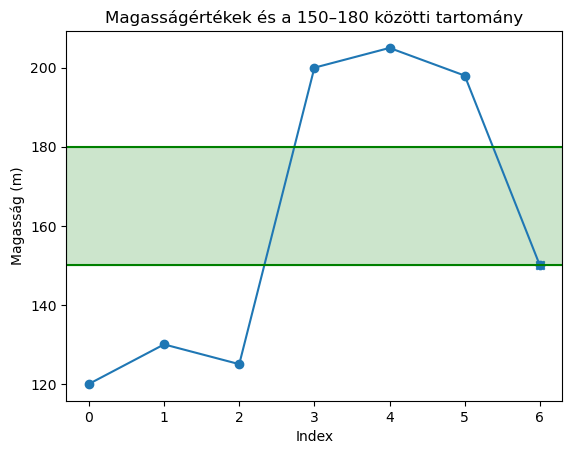

In [69]:
elev = np.array([120, 130, 125, 200, 205, 198, 150])
idx = np.where((elev >= 150) & (elev <= 180))[0]

plt.figure()
plt.plot(elev, marker='o')
plt.scatter(idx, elev[idx], marker='x')
plt.axhspan(150, 180, color='g', alpha=0.2) # halványzöld sáv
plt.axhline(150, color="green")
plt.axhline(180, color="green")
plt.title("Magasságértékek és a 150–180 közötti tartomány")
plt.xlabel("Index")
plt.ylabel("Magasság (m)")
plt.show()